In [1]:
import os
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

/Users/lihuiyang/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
train_data_path = os.path.join(os.getcwd(), 'Data','PartC','e-cornellFinal.csv')
train = pd.read_csv(train_data_path, encoding='Latin-1')
test_data_path = os.path.join(os.getcwd(), 'Data','PartC','3cornell.csv')
test = pd.read_csv(test_data_path, encoding='Latin-1')

In [3]:
X_train=train.drop(['label'], axis=1) #features
y_train=train['label'] #targets
X_test=test.drop(['label'], axis=1) #features
y_test=test['label'] #targets

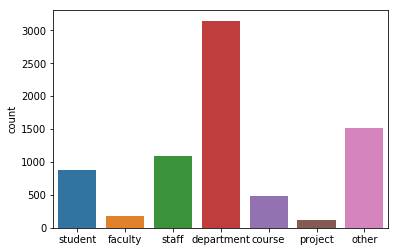

In [4]:
ax = sns.countplot(x='label', data=train)
ax.set_xticklabels(['student', 'faculty', 'staff','department', 'course', 'project', 'other'])
plt.xlabel('')
plt.show()

In [6]:
print("X_tra Info:")
train.info()

X_tra Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Columns: 32729 entries, label to flushing
dtypes: int64(32729)
memory usage: 1.8 GB


In [7]:
train.describe()

,label,aastha,ila,ignition,innumerable,religion,audit,attending,kanal,classifiers,...,shukla,iyer,hinds,manifolds,ybliu,tne,lateral,worshipping,repository,flushing
count,7414.000000,7414.0,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,...,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,4.154842,0.0,0.000405,0.000944,0.000270,0.004316,0.002158,0.005395,0.000674,0.001484,...,0.001349,0.000674,0.000270,0.000540,0.000270,0.000135,0.003372,0.000270,0.016725,0.000270
std,1.805542,0.0,0.025968,0.053216,0.016423,0.145002,0.059184,0.088289,0.038515,0.050605,...,0.040211,0.034837,0.016423,0.028445,0.016423,0.011614,0.129811,0.016423,0.202482,0.016423
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,0.0,2.000000,4.000000,1.000000,10.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,9.000000,1.000000,10.000000,1.000000


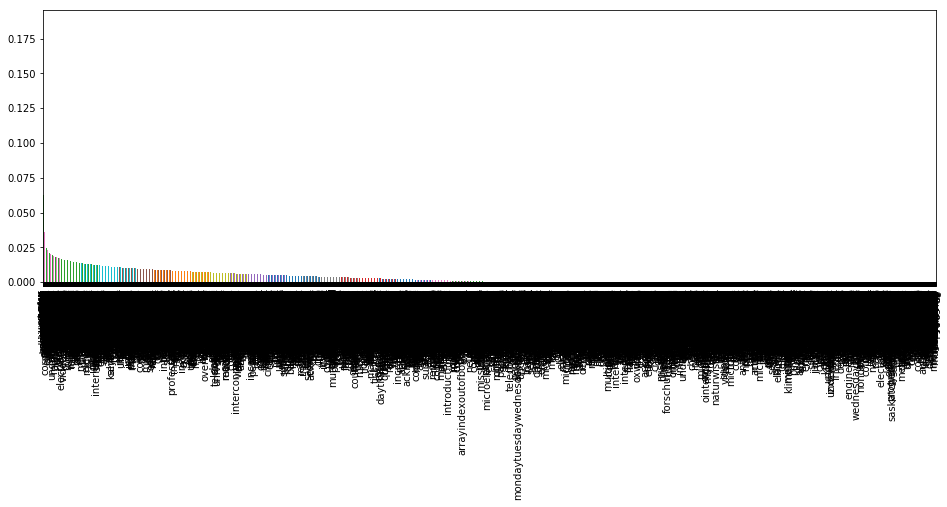

In [8]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train,copy =False)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

mi= pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace=True)

mi.plot.bar(figsize=(16,5))

In [9]:
from sklearn.feature_selection import SelectPercentile, chi2
selector = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train, y_train)
print(len(X_train.columns[selector.get_support()]))

X_train_mi = selector.transform(X_train)
X_test_mi = selector.transform(X_test)
print(X_train_mi.shape)
print(X_test_mi.shape)

3273
(7414, 3273)
(867, 3273)


In [10]:
#format of TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vect = TfidfTransformer()
train_tfidf = tfidf_vect.fit_transform(X_train_mi)
test_tfidf = tfidf_vect.fit_transform(X_test_mi)

X_train_tfidf=train_tfidf.toarray()
X_test_tfidf=test_tfidf.toarray()

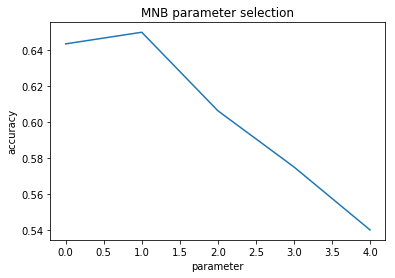

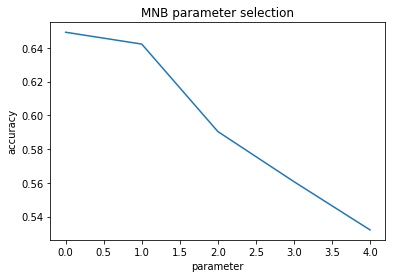

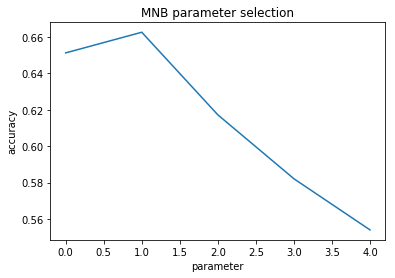

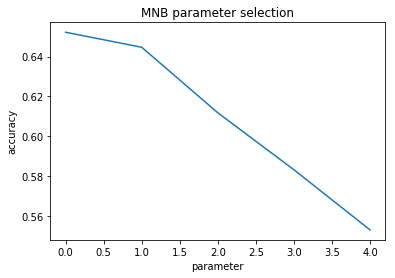

Average precision score mean: 0.6050742433547381
Average precision score Standard Deviation: 0.04195316370464095
Average recall score mean: 0.6050742433547381
Average recall score Standard Deviation: 0.04195316370464095
f1_score mean: 0.34860503227409995
f1_score Standard Deviation: 0.09016842293729148
accuracy mean: 0.6050742433547381
accuracy Standard Deviation: 0.04195316370464095


In [11]:
#KFold MultinomialNB accuracy_score f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    list_accuracy1=[]
    for i in range(0,5):
        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        clf = MultinomialNB(alpha=i)
        clf.fit(X_train_k, y_train_k)  
        a=clf.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
    plt.plot(range(0,5),list_accuracy1)
    plt.xlabel("parameter")
    plt.ylabel("accuracy")
    plt.title('MNB parameter selection')
    plt.show()
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

In [19]:
#KFold MultinomialNB accuracy_score f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        clf = MultinomialNB(alpha=1)
        clf.fit(X_train_k, y_train_k)  
        a=clf.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)

print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

Average precision score mean: 0.6498525827201509
Average precision score Standard Deviation: 0.007836638878412941
Average recall score mean: 0.6498525827201509
Average recall score Standard Deviation: 0.007836638878412941
f1_score mean: 0.37485672120652014
f1_score Standard Deviation: 0.005268904170107706
accuracy mean: 0.6498525827201509
accuracy Standard Deviation: 0.007836638878412941


In [12]:
#KFold LogisticRegression accuracy_score f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)

list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
    y_train_k, y_validation = y_train[train_la], y_train[valid_la]
    lr=LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train_k, y_train_k)  
    a=lr.predict(X_validation)
    
    f1_score=metrics.f1_score(y_validation, a, average='macro')
    accuracy=accuracy_score(y_validation, a)
    p = precision_score(y_validation, a, average='micro')
    R = recall_score(y_validation, a, average='micro')
        
    list_f1.append(f1_score)
    list_accuracy.append(accuracy)
    list_Precision.append(p)
    list_Recall.append(R)
    
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall)) 
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))


# change multi_class parameter to the one-vs-rest (OvR) scheme that is suitable for the multiclass case

skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
    y_train_k, y_validation = y_train[train_la], y_train[valid_la]
    lr=LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_k, y_train_k)  
    a=lr.predict(X_validation)
    
    f1_score=metrics.f1_score(y_validation, a, average='macro')
    accuracy=accuracy_score(y_validation, a)
    p = precision_score(y_validation, a, average='micro')
    R = recall_score(y_validation, a, average='micro')
        
    list_f1.append(f1_score)
    list_accuracy.append(accuracy)
    list_Precision.append(p)
    list_Recall.append(R)
    
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall)) 
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

Average precision score mean: 0.791474821859954
Average precision score Standard Deviation: 0.008674843312795525
Average recall score mean: 0.791474821859954
Average recall score Standard Deviation: 0.008674843312795525
f1_score mean: 0.6682477692967221
f1_score Standard Deviation: 0.007819274584395547
accuracy mean: 0.791474821859954
accuracy Standard Deviation: 0.008674843312795525
Average precision score mean: 0.7833819416004827
Average precision score Standard Deviation: 0.006983347316886302
Average recall score mean: 0.7833819416004827
Average recall score Standard Deviation: 0.006983347316886302
f1_score mean: 0.6478454003654134
f1_score Standard Deviation: 0.0025893210962076715
accuracy mean: 0.7833819416004827
accuracy Standard Deviation: 0.006983347316886302


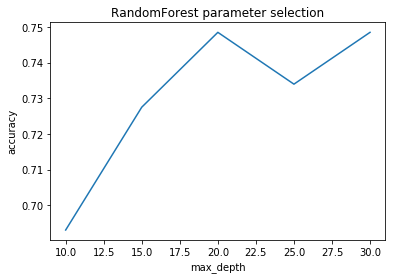

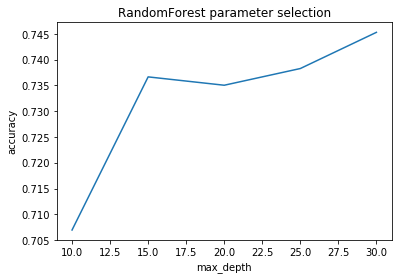

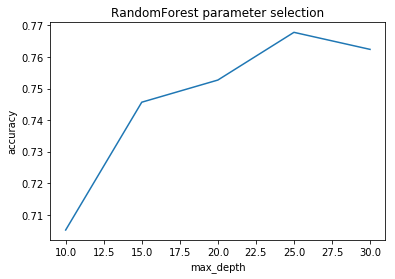

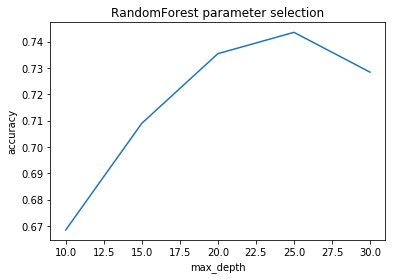

Average precision-recall score mean: 0.7316166276357012
Average precision-recall score Standard Deviation: 0.023690112456136274
Average precision-recall score mean: 0.7316166276357012
Average precision-recall score Standard Deviation: 0.023690112456136274
f1_score mean: 0.5408918173416581
f1_score Standard Deviation: 0.05023988774111041
accuracy mean: 0.7316166276357012
accuracy Standard Deviation: 0.023690112456136274


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    list_accuracy1=[]
    for i in range(10,35,5):
        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        classifier = RandomForestClassifier(max_depth=i, random_state=0)
        classifier.fit(X_train_k, y_train_k)  
        a=classifier.predict(X_validation)
        
        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
    plt.plot(range(10,35,5),list_accuracy1)
    plt.xlabel("max_depth")
    plt.ylabel("accuracy")
    plt.title('RandomForest parameter selection')
#     plt.savefig('RandomForest_accuracy.png',dpi=100)
    plt.show()
        
print('Average precision-recall score mean:', np.mean(list_Precision))
print('Average precision-recall score Standard Deviation:', np.std(list_Precision))
print('Average precision-recall score mean:', np.mean(list_Recall))
print('Average precision-recall score Standard Deviation:', np.std(list_Recall))   
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

# plt.plot(range(1,100),list_accuracy)
# plt.xlabel("number of neighbors")
# plt.ylabel("accuracy")
# plt.title('RandomForest parameter selection')
# plt.savefig('RandomForest_accuracy.png',dpi=100)
# plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):

        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        classifier = RandomForestClassifier(max_depth=25, random_state=0)
        classifier.fit(X_train_k, y_train_k)  
        a=classifier.predict(X_validation)
        
        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
print('Average precision-recall score mean:', np.mean(list_Precision))
print('Average precision-recall score Standard Deviation:', np.std(list_Precision))
print('Average precision-recall score mean:', np.mean(list_Recall))
print('Average precision-recall score Standard Deviation:', np.std(list_Recall))   
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

# plt.plot(range(1,100),list_accuracy)
# plt.xlabel("number of neighbors")
# plt.ylabel("accuracy")
# plt.title('RandomForest parameter selection')
# plt.savefig('RandomForest_accuracy.png',dpi=100)
# plt.show()

Average precision-recall score mean: 0.7458952267870107
Average precision-recall score Standard Deviation: 0.0131007442344936
Average precision-recall score mean: 0.7458952267870107
Average precision-recall score Standard Deviation: 0.0131007442344936
f1_score mean: 0.579027911587226
f1_score Standard Deviation: 0.013557610871578278
accuracy mean: 0.7458952267870107
accuracy Standard Deviation: 0.0131007442344936


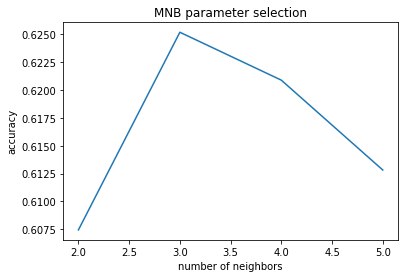

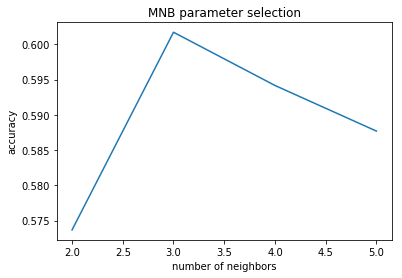

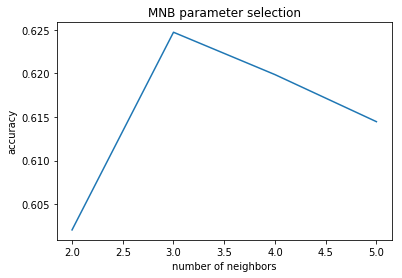

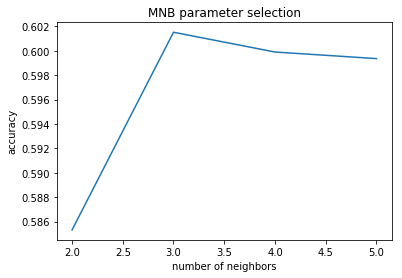

Average precision score mean: 0.6044246430776128
Average precision score Standard Deviation: 0.014357703157554986
Average recall score mean: 0.6044246430776128
Average recall score Standard Deviation: 0.014357703157554986
f1_score mean: 0.4813992318419687
f1_score Standard Deviation: 0.012838214728019732
accuracy mean: 0.6044246430776128
accuracy Standard Deviation: 0.014357703157554986


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    list_accuracy1=[]
    for i in range(2,6):
        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train_k, y_train_k)  
        a=neigh.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
    plt.plot(range(2,6),list_accuracy1)
    plt.xlabel("number of neighbors")
    plt.ylabel("accuracy")
    plt.title('MNB parameter selection')
    plt.show()
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):

        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(X_train_k, y_train_k)  
        a=neigh.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

Average precision score mean: 0.6132926921406106
Average precision score Standard Deviation: 0.011674727873570373
Average recall score mean: 0.6132926921406106
Average recall score Standard Deviation: 0.011674727873570373
f1_score mean: 0.48899121811440827
f1_score Standard Deviation: 0.012523911428356366
accuracy mean: 0.6132926921406106
accuracy Standard Deviation: 0.011674727873570373


In [17]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        gnb = GaussianNB()
        gnb.fit(X_train_k, y_train_k)  
        a=gnb.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

Average precision score mean: 0.3605367197704053
Average precision score Standard Deviation: 0.014937028619640049
Average recall score mean: 0.3605367197704053
Average recall score Standard Deviation: 0.014937028619640049
f1_score mean: 0.2977887243772887
f1_score Standard Deviation: 0.01745301965185387
accuracy mean: 0.3605367197704053
accuracy Standard Deviation: 0.014937028619640049
